# **Part 1: DATA PRE-PROCESSING**

**1. Importing Libraries**








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error


**2. Reading & understanding the data**

Data Credits: https://www.kaggle.com/ashydv/housing-dataset

In [ ]:
df = pd.read_csv('../input/housing-dataset/Housing.csv')
df_copy = df.copy(deep=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

**Observations:**



*   Data size is (545,13)

*   None of the columns has Null values


*   **'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'** has numerical values

*   **'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning'
       , 'prefarea'**  has yes/no values


*   **'furnishingstatus'** has three values viz. *'furnished', 'semi-furnished', 'unfurnished'*





**3. Changing yes/no values to 1/0**

In [ ]:
cat_columns = ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
        'prefarea']

def binary_mapping(x):
  return x.map({'yes': 1, "no": 0})

df[cat_columns] = df[cat_columns].apply(binary_mapping)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


**4. Encoding Furnishing Status**

We use One Hot Encoding here, as there are three categories & none of which can't be assigned any values randomly.

Credits: https://www.mygreatlearning.com/blog/label-encoding-in-python/ &
        https://stackoverflow.com/a/56339153/16821645

In [ ]:
ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')
ohe_df = pd.DataFrame(ohe.fit_transform(df[['furnishingstatus']]))

ohe_df.columns = ohe.get_feature_names(['status'])

ohe_df.head()

,status_semi-furnished,status_unfurnished
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
df = pd.concat([df,ohe_df], axis=1)
df.drop(['furnishingstatus'], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,status_semi-furnished,status_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0.0,0.0


# **Part 2: Data Visualization**

**Plotting using Seaborn**

Credits: https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850

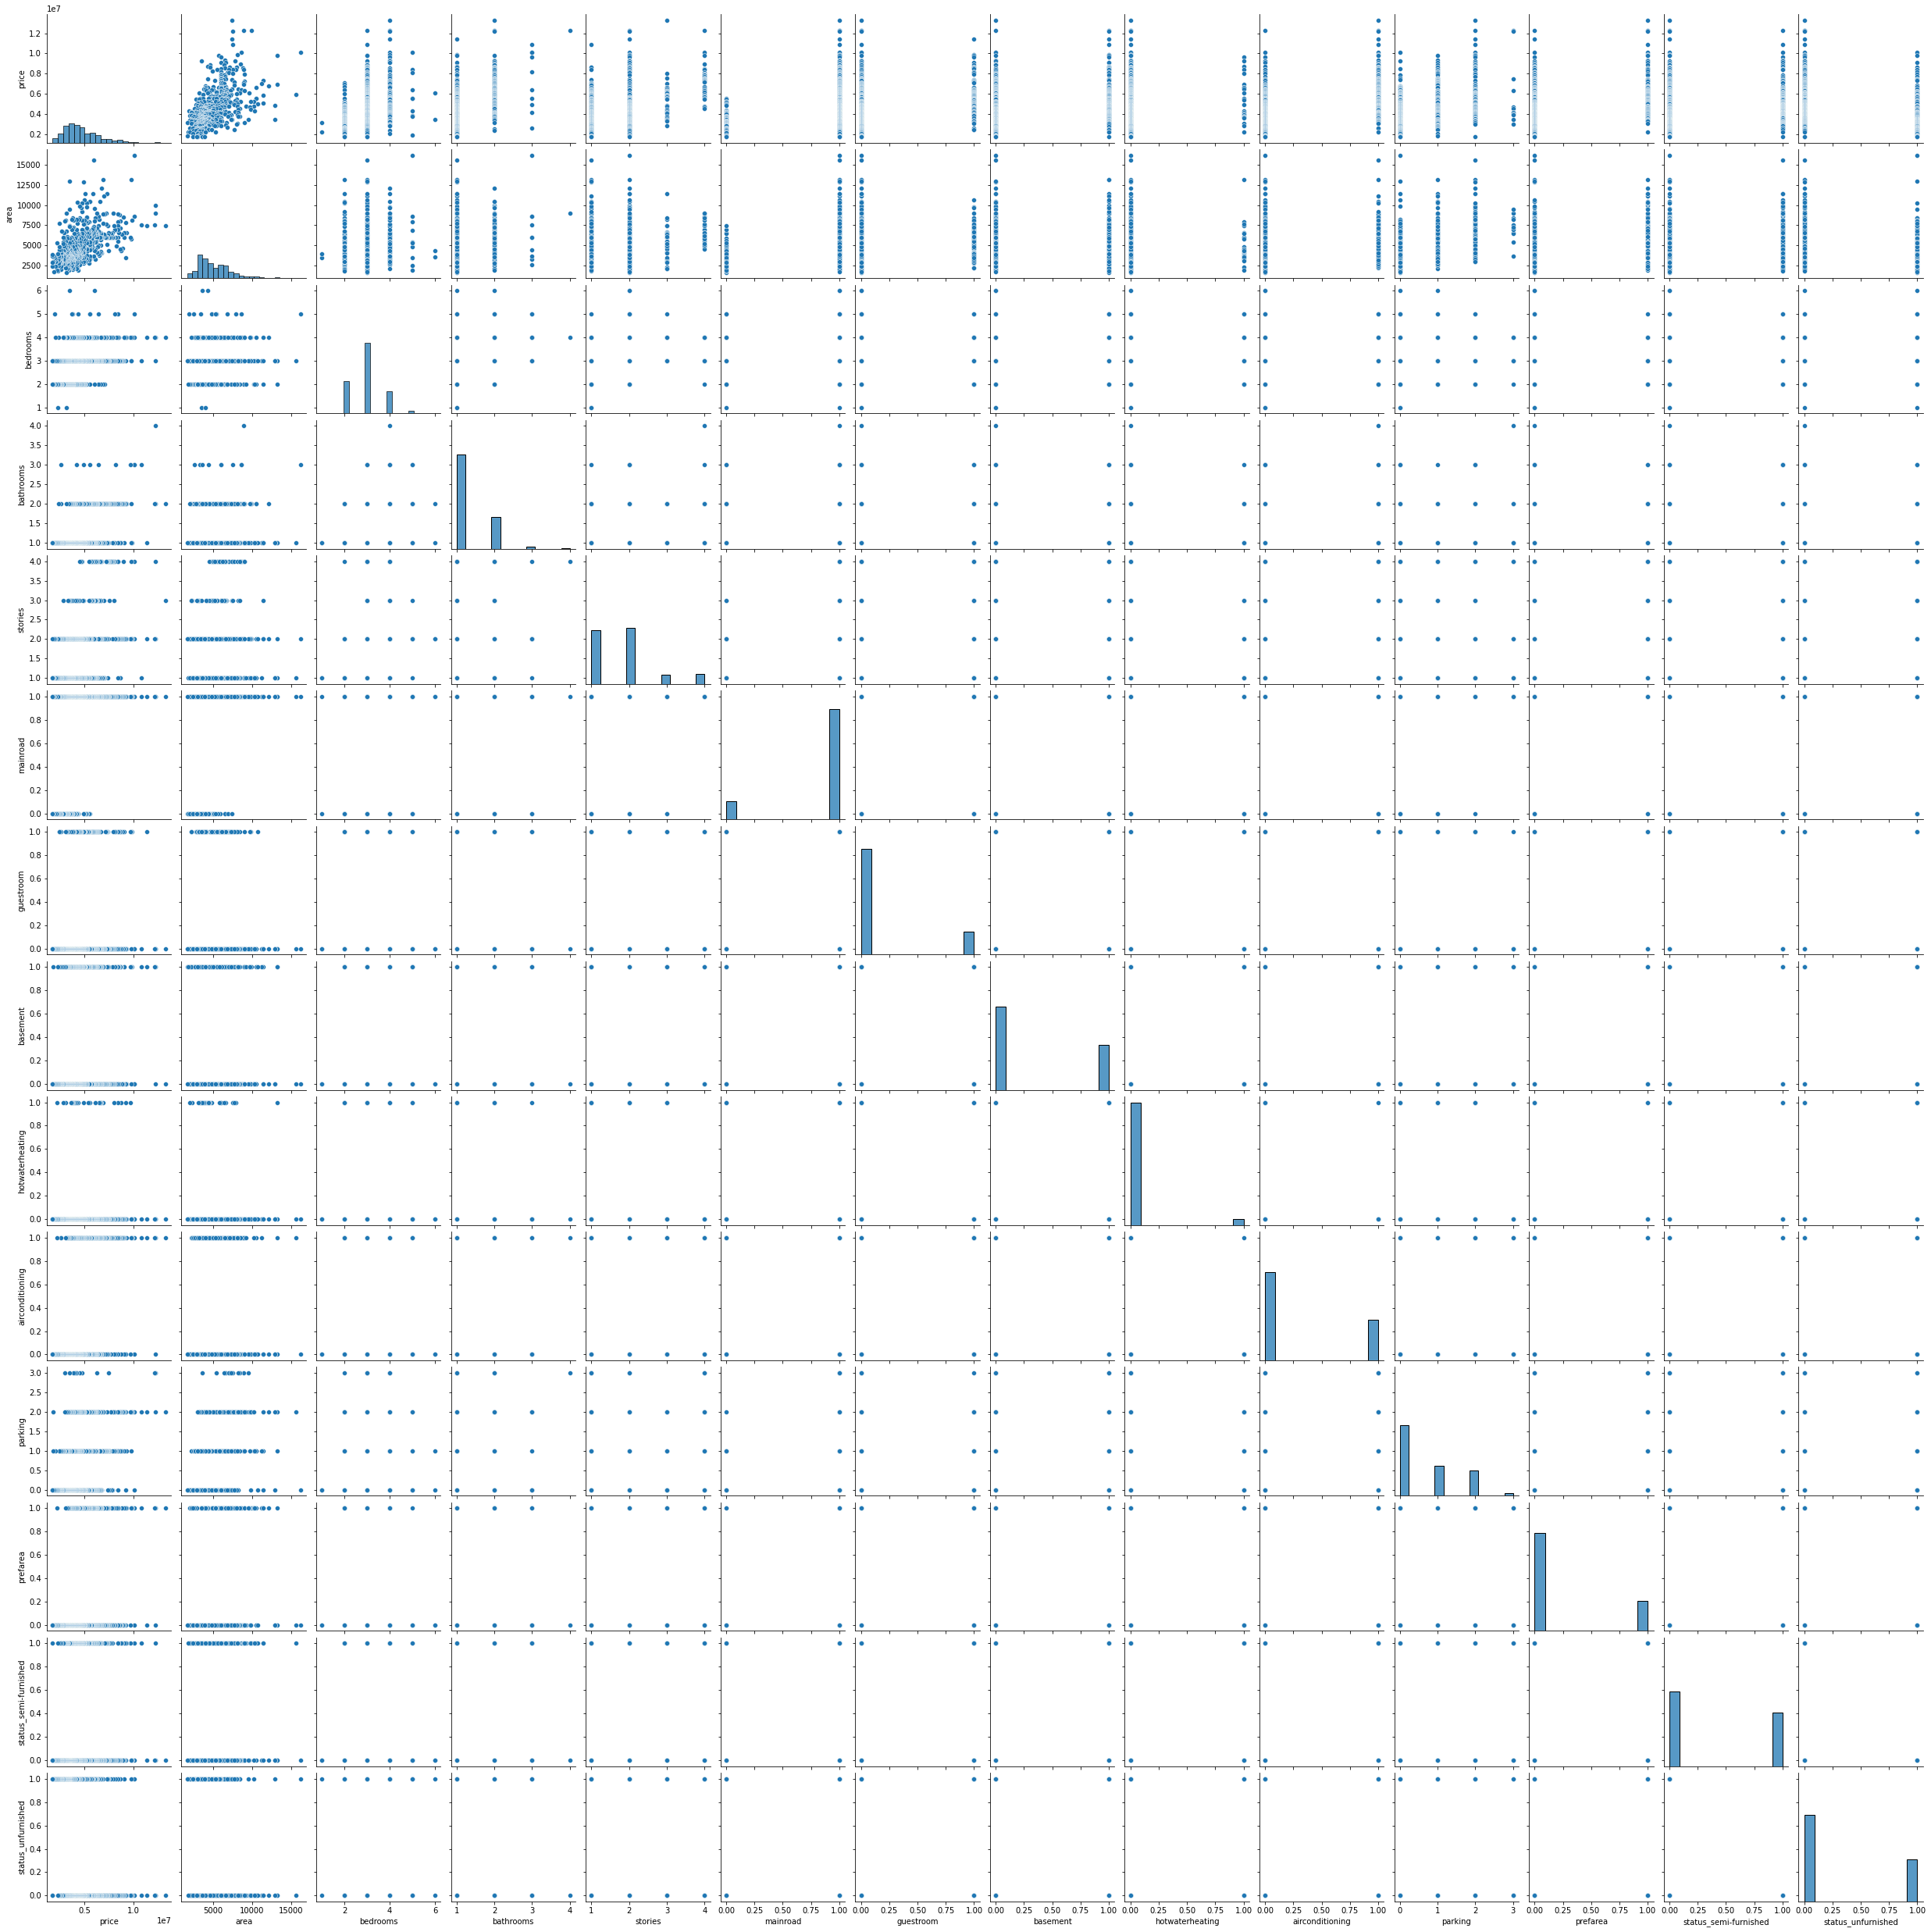

In [ ]:
sns.pairplot(df)
plt.show()

The above graphs subplots variation of one parameter wrt other. For better visulization let's take some more graphs.

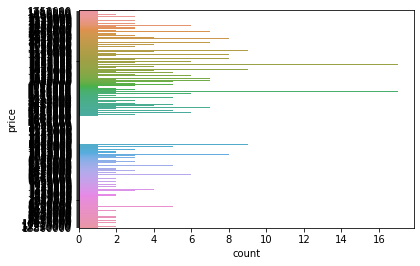

In [ ]:
sns.countplot(y='price', data=df_copy)
plt.show()

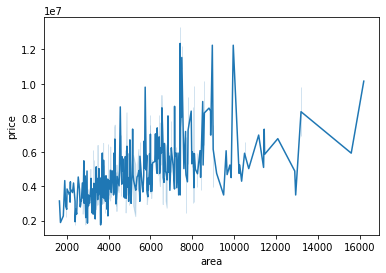

In [ ]:
sns.lineplot(x='area', y='price', data=df_copy)
plt.show()

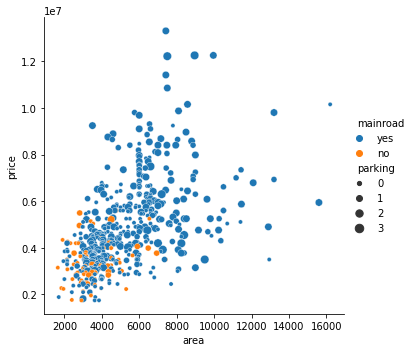

In [ ]:
sns.relplot(x='area',y='price',hue='mainroad',size='parking',data=df_copy)

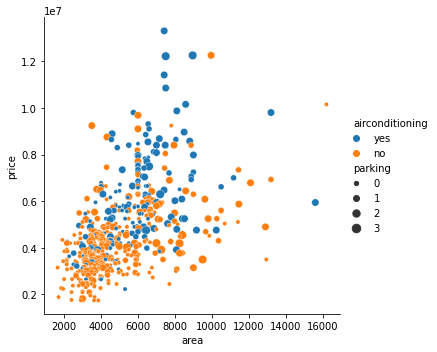

In [ ]:
sns.relplot(x='area',y='price',hue='airconditioning',size='parking',data=df_copy)

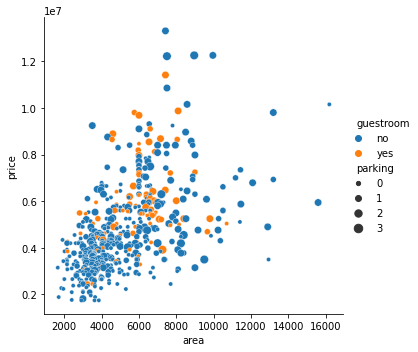

In [ ]:
sns.relplot(x='area',y='price',hue='guestroom',size='parking',data=df_copy)

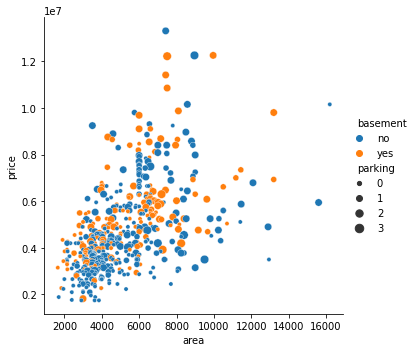

In [ ]:
sns.relplot(x='area',y='price',hue='basement',size='parking',data=df_copy)

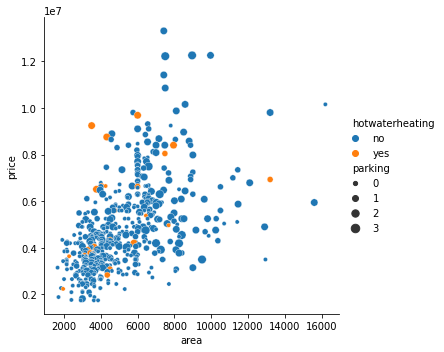

In [ ]:
sns.relplot(x='area',y='price',hue='hotwaterheating',size='parking',data=df_copy)

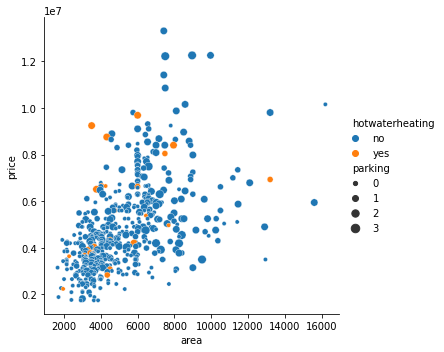

In [ ]:
sns.relplot(x='area',y='price',hue='hotwaterheating',size='parking',data=df_copy)

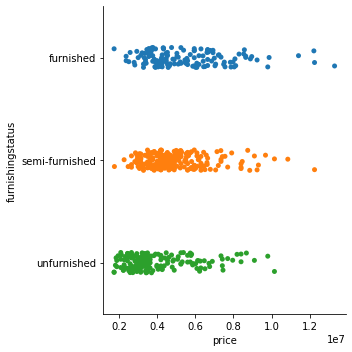

In [ ]:
sns.catplot(x='price', y='furnishingstatus', data=df_copy)

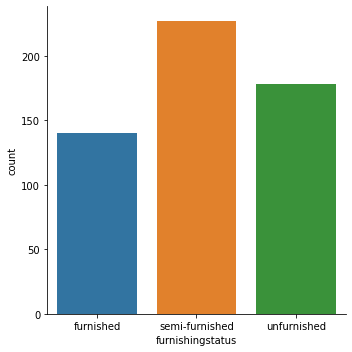

In [ ]:
sns.catplot(x='furnishingstatus',kind='count',data=df_copy ,orient='h')

In the similar fashion we can create any graph & then visualize the same as per our need.

# **Part 3: Model Fitting**

**1. Data Scaling**

In given data some columns have very high values, some very low. to make an efficient model, it's necessary to scale the data in those numerical columns


In [ ]:
df_new = df.copy(deep=True)
num_columns = ['area', 'bedrooms', 'bathrooms', 'stories','parking']

df_new[num_columns] = MinMaxScaler().fit_transform(df_new[num_columns])

df_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,status_semi-furnished,status_unfurnished
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0.0,0.0
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0.0,0.0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1.0,0.0
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0.0,0.0
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0.0,0.0


**2. Test & Train data split**

Credits: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
y = df_new.pop('price')
x = df_new

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

**3. Model Training**

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([3489014.70667712,  358881.43099088, 3372187.31277727,
       1159280.17187477,  372650.91306051,  270917.18289615,
        401008.77558814,  691330.60646909,  768994.68598486,
        776644.00229882,  627423.31246911, -177801.37946355,
       -412019.55299709])

In [ ]:
model.intercept_

2251647.5139513277

**4. Prediction**

In [ ]:
y_pred = model.predict(x_test)

# **Part 4: Evaluation**

**Graphical visualization**

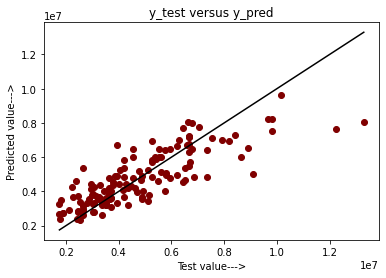

In [ ]:
plt.scatter(y_test,y_pred, c='maroon')
x=y
plt.plot(x,y,c='k')
plt.title('y_test versus y_pred')
plt.xlabel('Test value--->')
plt.ylabel('Predicted value--->')
plt.show()

**Actual Price & Predicted price DataFrame**


In [ ]:
per_error = 100*(y_pred-y_test)/y_test

df_prd_tst = pd.DataFrame({'Predicted Price':y_pred.astype('int64'), 'Actual Price':y_test, '% Error':per_error})
df_prd_tst.to_csv('prediction.csv')

In [ ]:
df_prd_tst

,Predicted Price,Actual Price,% Error
316,5244464,4060000,29.173993
77,7224189,6650000,8.634433
360,3091382,3710000,-16.674314
90,4548783,6440000,-29.366713
493,3321777,2800000,18.634894
...,...,...,...
172,6946979,5250000,32.323426
124,6479074,5950000,8.892012
388,3221847,3500000,-7.947205
521,2387396,2408000,-0.855607


**Exporting Prediction as csv**

In [ ]:
df_prd_tst.to_csv('Predictions.csv')

**Maximum, Minimum & Average Absolute Percentage Error**



In [ ]:
abs(per_error).max()

101.63319809354029

In [ ]:
abs(per_error).min()

0.22212193535036584

In [ ]:
abs(per_error).mean()

20.882962909042565

**Root Mean Square Error (RMSE)**

In [ ]:
mean_squared_error(y_test, y_pred, squared = False)

#'Squared = False' will give RMSE.

1245949.1294090012

**R2 Score**

In [ ]:
r2_score(y_test, y_pred)

0.6631280462200978

# **FINAL WORDS**

This was our simple project of Machine Learning for Housing Price using Linear Regression Model.

We can further make this model better by removing outliers in dataset with help of seaborn boxplot.

Thanks for scrolling down :-)